In [47]:
# Import packages
import glob  # SAH: For file path pattern matching and retrieving file lists
import numpy as np  # SAH: For numerical operations and array handling
import pandas as pd  # SAH: For data manipulation and analysis
from PIL import Image  # SAH: For image processing and opening image files
import matplotlib.pyplot as plt  # SAH: For plotting and visualizing data/images


In [48]:
from pathlib import Path

In [49]:
# SAH:
from tensorflow import keras

#------

from keras.preprocessing.image import load_img, img_to_array  # SAH: For loading and converting images to arrays for model input
from keras.utils import to_categorical  # SAH: For converting labels to one-hot encoded format
from keras.models import Sequential  # SAH: For creating a linear stack of neural network layers
from keras.layers import Conv2D, MaxPooling2D  # SAH: For adding convolutional and pooling layers to the model
from keras.layers import Dense, Flatten  # SAH: For adding dense (fully connected) and flatten layers
from keras.optimizers import SGD  # SAH: For using the Stochastic Gradient Descent optimizer

In [50]:
# Create filepaths for the laptop battery and mormal battery images
filepath_laptop = "image/battery/laptop/*"
filepath_normal = "image/battery/normal/*"


In [51]:
# Collect all the image filepaths into lists

laptop_files = [file for file in glob.iglob(filepath_laptop)]
normal_files = [file for file in glob.iglob(filepath_normal)]

# SAH:
print("Laptop files:", len(laptop_files)) # 259
print("Normal files:", len(normal_files)) # 592
print("Total files:", len(laptop_files) + len(normal_files)) # 851


Laptop files: 259
Normal files: 592
Total files: 851


In [52]:
normal_files

['image/battery/normal/battery542.jpg',
 'image/battery/normal/battery608.jpg',
 'image/battery/normal/battery83.jpg',
 'image/battery/normal/battery133.jpg',
 'image/battery/normal/battery554.jpg',
 'image/battery/normal/battery623.jpg',
 'image/battery/normal/battery694.jpg',
 'image/battery/normal/battery215.jpg',
 'image/battery/normal/battery638.jpg',
 'image/battery/normal/battery199.jpg',
 'image/battery/normal/battery123.jpg',
 'image/battery/normal/battery690.jpg',
 'image/battery/normal/battery653.jpg',
 'image/battery/normal/battery182.jpg',
 'image/battery/normal/battery547.jpg',
 'image/battery/normal/battery223.jpg',
 'image/battery/normal/battery46.jpg',
 'image/battery/normal/battery744.jpg',
 'image/battery/normal/battery703.jpg',
 'image/battery/normal/battery142.jpg',
 'image/battery/normal/battery648.jpg',
 'image/battery/normal/battery764.jpg',
 'image/battery/normal/battery222.jpg',
 'image/battery/normal/battery48.jpg',
 'image/battery/normal/battery822.jpg',
 'i

In [53]:
#Create input(data) and output(target) dataset
#Label laptop battery as 1, and normal battery as 0

data = [] # SAH: All battery images
target = [] # laptop battery images

for lap in range(len(laptop_files)):
    
    # SAH: Load each image and resize (224x224),
    img = load_img(laptop_files[lap], target_size = (224, 224))
    
    # SAH: Convert img to NumPy array
    x = np.array(img)

    # SAH: Append image to data[]
    data.append(x)

    # SAH: Label: 1 = laptop battery, 0 = other battery
    target.append(1) #Laptop: Label 1

for nor in range(len(normal_files)):
    img = load_img(normal_files[nor], target_size = (224, 224))
    x = np.array(img)
    data.append(x)
    target.append(0) #Other: Label 0
    
# SAH - shape of a single entry in the list:
data[0].shape # (224, 224, 3) -> 224 x 224 pixels and 3 channels (RGB) - 3 dimensional array


(224, 224, 3)

In [54]:
# SAH: We convert whole dataset into array. Before that we have a list of numpy arrays
data = np.array(data)
target = np.array(target)

In [55]:
# SAH: Largely 255,255,255 because white background
data



array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [254, 254, 254],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [254, 254, 254],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [254, 254, 254],
         ...,
         [255, 255, 255],
        

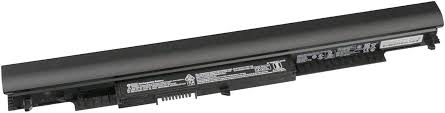

In [56]:
# SAH:
from PIL import Image
img = Image.open(laptop_files[0])
img.show()

In [57]:
data.shape

(851, 224, 224, 3)

In [58]:
target.shape # SAH: (851,) - Either 1 or 0 depending on battery type

(851,)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
#Separate data and target into train and test data.
# SAH: 80% Training, 20% Testing
x_train, x_test, y_train, y_test = train_test_split(data, target,
                                                    test_size = 0.2, #80/20
                                                    random_state = 0)

# SAH: Check dataset shapes
print("x_train:", x_train.shape)  # Training images
print("y_train:", y_train.shape)  # Training labels
print("x_test :", x_test.shape)   # Test images
print("y_test :", y_test.shape)   # Test labels

x_train: (680, 224, 224, 3)
y_train: (680,)
x_test : (171, 224, 224, 3)
y_test : (171,)


In [61]:
x_train

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [62]:
x_train[291].shape

(224, 224, 3)

In [63]:
len(x_train) # SAH: 680 training images equals 80% of 851 total images

680

In [64]:
len(x_test)

171

In [65]:
# SAH: not necessary here since images are already 224x224x3 - only needed if data was flattened
# But we still normalize the pixel values to be between 0 and 1
x_train = x_train.reshape(680, 224, 224, 3) / 255
x_test = x_test.reshape(171, 224, 224, 3) / 255

In [66]:
# SAH:
# Convert integer labels (0 or 1) into one-hot encoded vectors
# Example:
#   before: y_train[:5] = [1, 0, 1, 0, 1], shape = (680,)
#   after : y_train[:5] =
#           [[0., 1.],
#            [1., 0.],
#            [0., 1.],
#            [1., 0.],
#            [0., 1.]], shape = (680, 2)

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

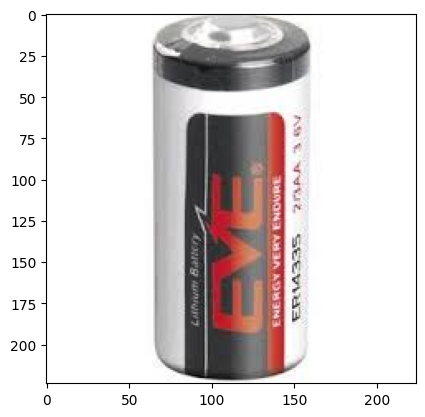

In [67]:
# SAH:
#   plt.imshow(x_train[291], cmap='Greys')
# - Selects the 292nd image from the training set
# - imshow() sees shape (224,224,3) → interprets as RGB → shows in color
# - The cmap='Greys' is ignored for 3-channel data (only works on 2D arrays)
# - To really force grayscale: plt.imshow(x_train[291].mean(axis=-1), cmap='Greys')

plt.imshow(x_train[291], cmap='Greys')

In [68]:
model = Sequential()

# SAH: 1st convolutional block
model.add(Conv2D(64, (3,3), padding='same', activation='relu',
                 input_shape=(224, 224, 3)))  # SAH: Added input shape
model.add(MaxPooling2D(pool_size=(2,2)))

# SAH: 2nd convolutional block
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# SAH: Flatten feature maps into a 1D vector
model.add(Flatten())

# SAH: Fully connected layer
model.add(Dense(64, activation='relu'))

# SAH: Output layer: 2 units (for 2 classes), with sigmoid activation
model.add(Dense(2, activation='sigmoid'))

In [69]:
# SAH - Compile the model
# - loss='binary_crossentropy' → good for binary classification
#   (normally used with 1 output neuron + sigmoid activation)
# - optimizer='adam' → adaptive optimizer, solid default choice
# - metrics=['accuracy'] → track accuracy during training/evaluation
#
#   Tip: Right now the model ends with Dense(2, activation='sigmoid').
#   This will work, but is not the cleanest setup.
#   More standard would be:
#     -> Dense(2, activation='softmax') with loss='categorical_crossentropy'
#        (when using one-hot labels, as with to_categorical)
#     -> OR Dense(1, activation='sigmoid') with loss='binary_crossentropy'
#        (when using integer labels 0/1)


model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [70]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 401408)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │    25,690,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,765,954 (98.29 MB)

 Trainable params: 25,765,954 (98.29 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
# SAH: Train the model
# - x_train, y_train → training data and labels
# - batch_size=100   → process 100 images at a time (mini-batch gradient descent)
# - epochs=50        → loop over the entire training set 50 times
# Each epoch = ~7 updates here (680 images / 100 per batch)
# During training:
#   1. Forward pass (predict)
#   2. Compute loss vs labels
#   3. Backprop + weight update (Adam optimizer)
#   4. Report loss/accuracy per epoch

model.fit(x_train, y_train, batch_size=100, epochs=50)

Epoch 1/50


I0000 00:00:1758121427.990874  860328 service.cc:148] XLA service 0x7face800ae40 initialized for platform ROCM (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758121427.990950  860328 service.cc:156]   StreamExecutor device (0): AMD Instinct MI300X, AMDGPU ISA version: gfx942:sramecc+:xnack-
2025-09-17 15:03:48.037633: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1758121448.041447  860328 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7/7 ━━━━━━━━━━━━━━━━━━━━ 80s 10s/step - accuracy: 0.5781 - loss: 5.5549
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 267ms/step - accuracy: 0.6653 - loss: 0.6572
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - accuracy: 0.6875 - loss: 0.6188
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - accuracy: 0.6979 - loss: 0.5653
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - accuracy: 0.7632 - loss: 0.4909
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - accuracy: 0.8809 - loss: 0.3746
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - accuracy: 0.8961 - loss: 0.3265
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - accuracy: 0.9283 - loss: 0.2436
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - accuracy: 0.9228 - loss: 0.2507
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - accuracy: 0.9100 - loss: 0.2833
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 257ms/step - accuracy: 0.9401 - loss: 0.1807
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - accuracy: 0.9672 - loss: 0.1254
E

In [72]:
score = model.evaluate(x_test, y_test)

# SAH: Report test set performance
print("Test loss:", score[0])
print("Test accuracy:", score[1])

6/6 ━━━━━━━━━━━━━━━━━━━━ 89s 9s/step - accuracy: 0.8985 - loss: 0.3757


In [75]:
# Get model predictions on the test set
predict = model.predict(x_test)

# SAH:
print(predict.shape)
# predict.shape = (171, 2) → 2 scores per sample (class 0 vs class 1)
# Example for one sample: [0.2, 0.9]

# Convert prediction scores into class labels
# - np.argmax(..., axis=-1) picks the index of the largest score
# - So [0.2, 0.9] → 1, [0.8, 0.1] → 0
# - y_predict will be a 1D array of integers (0 or 1)
y_predict = np.argmax(model.predict(x_test), axis = -1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
(171, 2)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [1]:
w = 10 # pick the 11th test sample by index



# SAH: Show the corresponding test image
# - x_test[w] is one image (shape (224,224,3))
# - reshape(224,224,3) is redundant here, shape is already correct
# - cmap='Greys' only works for 2D arrays; with 3 channels it will still display in color
plt.imshow(x_test[w].reshape(224,224,3), cmap='Greys');

# SAH: Print the model's predicted class label (0 = normal, 1 = laptop)
print('The prediction of CNN is:', y_predict[w])
# Remember: laptop battery as 1, and normal battery as 0

NameError: name 'plt' is not defined

In [ ]:
# SAH: Save the entire trained model to disk
# - Includes: architecture, trained weights, optimizer state, compile info
# - Format: .keras (recommended in Keras v3, replaces old .h5 format)
# - Later can be reloaded with: load_model('models/week02/battery.keras')

model.save('models/week02/battery.keras')